In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_6982/2462029153.py:8: RuntimeWarning: invalid value encountered in power
  return (Rg + r0)**(-a) * np.exp(-Rg / rcut)


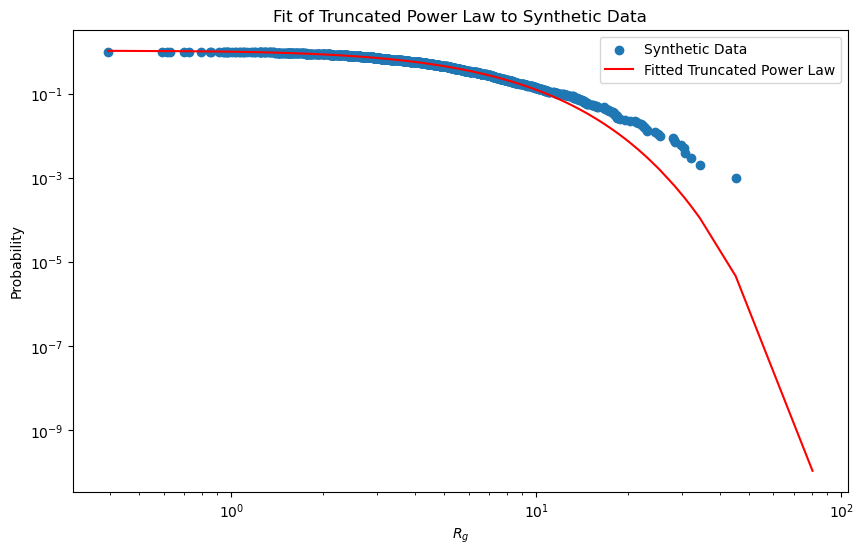

Fitted Parameters:
 r0 = 1.1054529406988074
 a = -0.4081662894065395
 rcut = 3.2590099900986815


In [2]:
# Generate some synthetic data for demonstration (this would be your observed Rg values in a real scenario)
np.random.seed(42)  # For reproducibility
Rg = np.random.lognormal(mean=1.5, sigma=0.75, size=1000)
Rg = np.sort(Rg)

# Truncated Power Law Function
def truncated_power_law(Rg, r0, a, rcut):
    return (Rg + r0)**(-a) * np.exp(-Rg / rcut)

# Fit the truncated power law to the synthetic data
params, covariance = curve_fit(truncated_power_law, Rg, np.linspace(1, 0, num=len(Rg)), maxfev=10000)

# Parameters
r0, a, rcut = params

# Plotting the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(Rg, np.linspace(1, 0, num=len(Rg)), label='Synthetic Data')
plt.plot(Rg, truncated_power_law(Rg, *params), color='red', label='Fitted Truncated Power Law')
plt.xlabel('$R_g$')
plt.ylabel('Probability')
plt.title('Fit of Truncated Power Law to Synthetic Data')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

# Print the fitted parameters
print(f"Fitted Parameters:\n r0 = {r0}\n a = {a}\n rcut = {rcut}")
